## CM4044: AI In Chemistry
## Semester 1 2020/21

<hr>

## Tutorial 3c: Introduction to Plotting with Seaborn
## Objectives

### $\bullet$ Plotting with Seaborn

<hr>



Seaborn provides a high-level interface to Matplotlib, a powerful but sometimes unwieldy Python visualization library. Seaborn is one of the most popular plotting package for exploratory data analysis (EDA) with pandas because of its simpler syntax and well attractive plotting style (aesthetically pleasing).

The official website for seaborn is [here](https://seaborn.pydata.org/) with [tutorial](https://seaborn.pydata.org/tutorial.html)


Though seaborn tries to give some control over your plots in a fancy way, but still you cannot get everything you desire from it. For that you will have to use matplotlib’s functionality, which you can use with seaborn too (as it is built on matplotlib).

This tutorial is base on the web blog at https://elitedatascience.com/python-seaborn-tutorial#step-4

## 1. Import Packages

To use seaborn, we need to import these packages:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

print(sns.__version__)

sns.set(style='whitegrid')


0.10.0


Load data to `DataFrame` object, here we use encoding `ISO-8859-1` because `utf-8` has some problems with certain information.
Also, we set `index_col = 0` so that the first column, `Name`, is used as row index.

In [2]:
# Read dataset
df = pd.read_csv('Pokemon.csv', encoding='ISO-8859-1', index_col=0)
print(df.shape)

df.head(10)   #display the first 10 rows

(151, 12)


,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False
6,Charizard,Fire,Flying,534,78,84,78,109,85,100,3,False
7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False
8,Wartortle,Water,NaN,405,59,63,80,65,80,58,2,False
9,Blastoise,Water,NaN,530,79,83,100,85,105,78,3,False


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151 entries, 1 to 151
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Name       151 non-null    object
 1   Type 1     151 non-null    object
 2   Type 2     67 non-null     object
 3   Total      151 non-null    int64 
 4   HP         151 non-null    int64 
 5   Attack     151 non-null    int64 
 6   Defense    151 non-null    int64 
 7   Sp. Atk    151 non-null    int64 
 8   Sp. Def    151 non-null    int64 
 9   Speed      151 non-null    int64 
 10  Stage      151 non-null    int64 
 11  Legendary  151 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 14.3+ KB


There are different types of plots to describe data:

1. Distribution Plots (Hist, KDE, [Bar, Volin])
2. Relational Plots (Line, Scatter, Hex, Pair, Heatmap)
3. Categorical Plots (Bar, Box, Violin)
4. Multiple Plots
5. Interactive Plots
6. Others: 3D Plots, Geographical Plots, World Clouds Plots, Animations



## 2. Distribution Plots

Distribution plots (or Probability plots) tells us how **one variable** is distributed. It gives us probability of finding a variable in particular range. I.e. if we were to randomly select a number from total range of a variable, it gives us probabilities of this variable being in different ranges.

Distribution plots should be Normally distributed, for better results. This is one of the assumptions of all Linear models, i.e. Normality. Normal distribution looks like a medium hump on middle with light tails

### 2.1 Histgram with KDE

For example, we can plot a speed distribution of Pokemon with seaborn `.distplot()`:

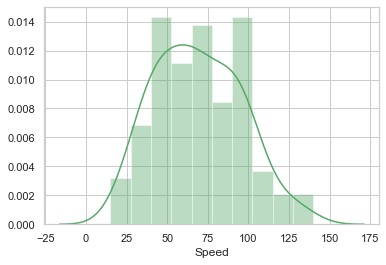

In [4]:

# distplot returns the object Ax
ax = sns.distplot(df['Speed'], bins = 10, color = 'g')



A bit more fancier control on display effect:

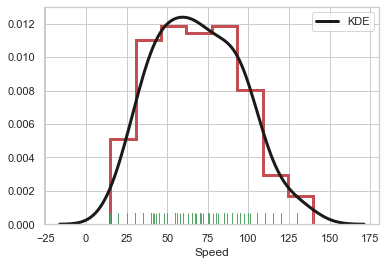

In [5]:
ax = sns.distplot(df['Speed'], rug=True, rug_kws={"color": "g"},
                  kde_kws={"color": "k", "lw": 3, "label": "KDE"},
                  hist_kws={"histtype": "step", "linewidth": 3,
                            "alpha": 1, "color": "r"})

This function combines the matplotlib `hist` function (with automatic calculation of a good default bin size) with the seaborn `kdeplot()` and `rugplot()` functions. It can also fit `scipy.stats` distributions and plot the estimated PDF over the data.

For the more sophiscated display effect, we have to use `matplotlib` on configurations.

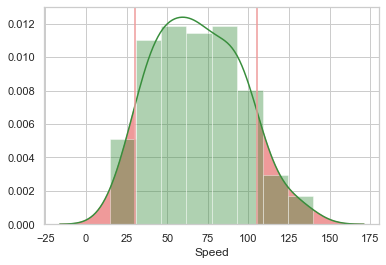

In [6]:
#plotting the PDF (do this before plotting anything else)
ax = sns.distplot(df['Speed'], hist=True,color='#388E3C')
kde_x, kde_y = ax.lines[0].get_data()

x0 = 30
x1 = 105
#plotting the two lines
p1 = plt.axvline(x=x0,color='#EF9A9A')
p2 = plt.axvline(x=x1,color='#EF9A9A')

ax.fill_between(kde_x, kde_y, where=(kde_x<x0) | (kde_x>x1) , 
                interpolate=True, color='#EF9A9A')

plt.show()

## 3. Relational Plots

Relational plots are very useful in getting **relationships between two or more variables**. These relationships can help us understand our data more, and probably help us make new variables from existing variables. 


### 3.1 Scatter plot

Scatter plots are used to plot data points on a horizontal and a vertical axis in the attempt to show how much one variable is affected by another. Each row in the data table is represented by a marker whose position depends on its values in the columns set on the X and Y axes.

The relationship between two variables is called their **correlation**. If the markers are close to making a straight line in the scatter plot, the two variables have a high correlation. If the markers are equally distributed in the scatter plot, the correlation is low, or zero. However, even though a correlation may seem to be present, this might not always be the case. Both variables could be related to some third variable, thus explaining their variation, or, pure coincidence might cause an apparent correlation.

Also, if we have lots of data points, scatter plot can come in handy to check if most data points are concentrated in one region or not, are there any outliers w.r.t. these two or three variables, etc.
We can plot scatter plot for two or three and even four variables if we color code the fourth variable in 3D plot.

For example, we plot a scatter plot based on 'Defense' and 'Attack' columns. The `sns.replot()` can plot data in line (`kind ='scatter'`) or scatter (`kind = 'line'`)

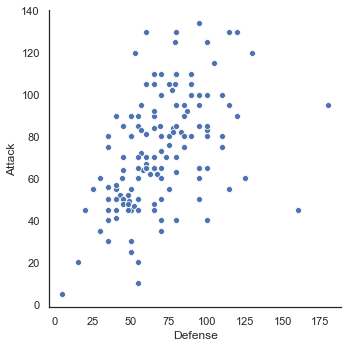

In [7]:
sns.set_style('white')
g = sns.relplot(x='Defense', y='Attack', data=df, kind='scatter')

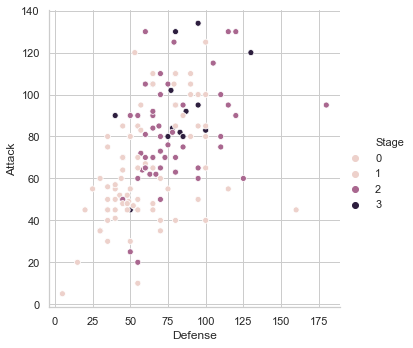

In [24]:
#g = sns.relplot(x='Defense', y='Attack', hue = 'Stage', palette = 'deep', data=df, kind='scatter')
g = sns.relplot(x='Defense', y='Attack', hue = 'Stage', data=df, kind='scatter')

### 3.2 Line plot

For example, we like to check the relation between `Sp.Atk` and `Attack` in a line plot by `sns.relplot()`. 

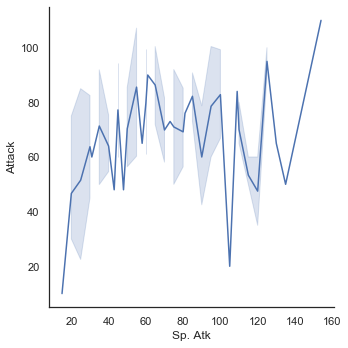

In [9]:
sns.set_style('white')

g = sns.relplot(x='Sp. Atk', y='Attack', data=df, kind='line')
#sns.despine()  # remove the upper and right spines

In the above the line plot, we can see the shadow around the line. The reason is:
`By default, the plot aggregates over multiple y values at each value of x and shows an estimate of the central tendency and a confidence interval for that estimate.`
If we don't want to show the shading, use option `ci = None`.
If we don't want to do aggregate, use option `estimator = None`.

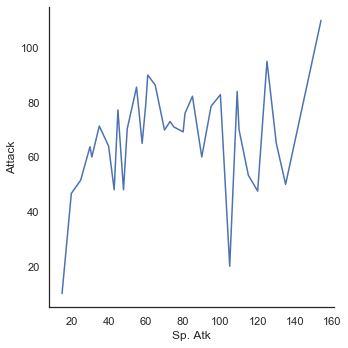

In [10]:
g = sns.relplot(x='Sp. Atk', y='Attack', data=df, kind='line', ci = None)

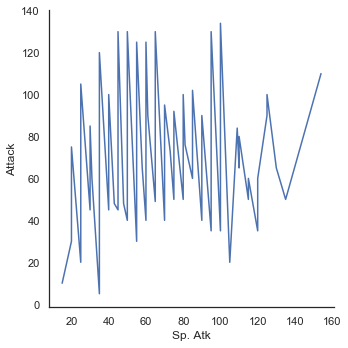

In [11]:
g = sns.relplot(x='Sp. Atk', y='Attack', data=df, kind='line', estimator = None)

Add one more information `hue = 'Stage'` as in the table the stage value can be 1, 2, or 3, so it is chosen to label different catogery of data.

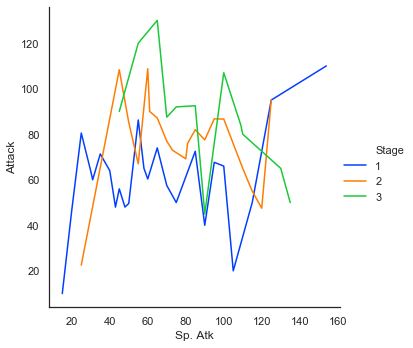

In [12]:
g = sns.relplot(x='Sp. Atk', y='Attack', hue = 'Stage', data=df, palette = 'bright', kind='line', ci = None)

In the deep level, `sns.relplot()` makes use of `sns.lineplot()` or `sns.scatterplot()` depending on the option `kind`.

There is another function `sns.lmplot()` creates almost the same graphs with built-in linear regression line to the display. For example:

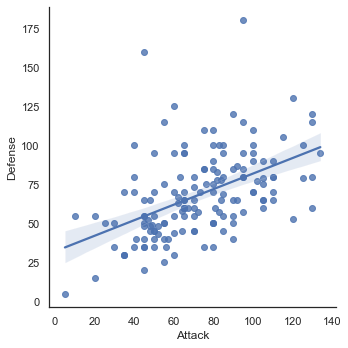

In [13]:
# Recommended way
g = sns.lmplot(x='Attack', y='Defense', data=df)
 
# Alternative way
# sns.lmplot(x=df.Attack, y=df.Defense)


### 3.3 Hex plot

Hex Plots can be used to check relative density of data at particular position. But But there is no separate Hex plot/2D-Hist plot method in seaborn, you can use jointplot method’s kind parameter for making a hex plot. 

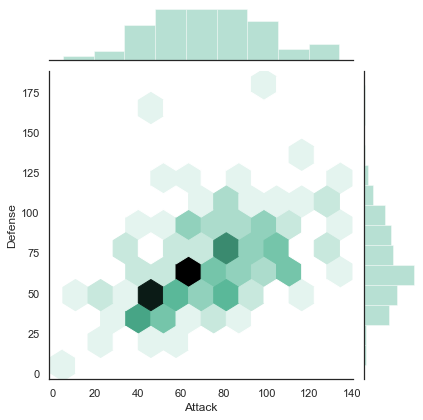

In [14]:
g = sns.jointplot(x='Attack', y='Defense', kind = 'hex', color="#4CB391", data=df)

### 3.4 Pair plot

`seaborn` provides a method pairplot with which you can plot all possible relational plots in one go. It can be used for quick view into relationship between all variables in your data, and also distribution of every variable.

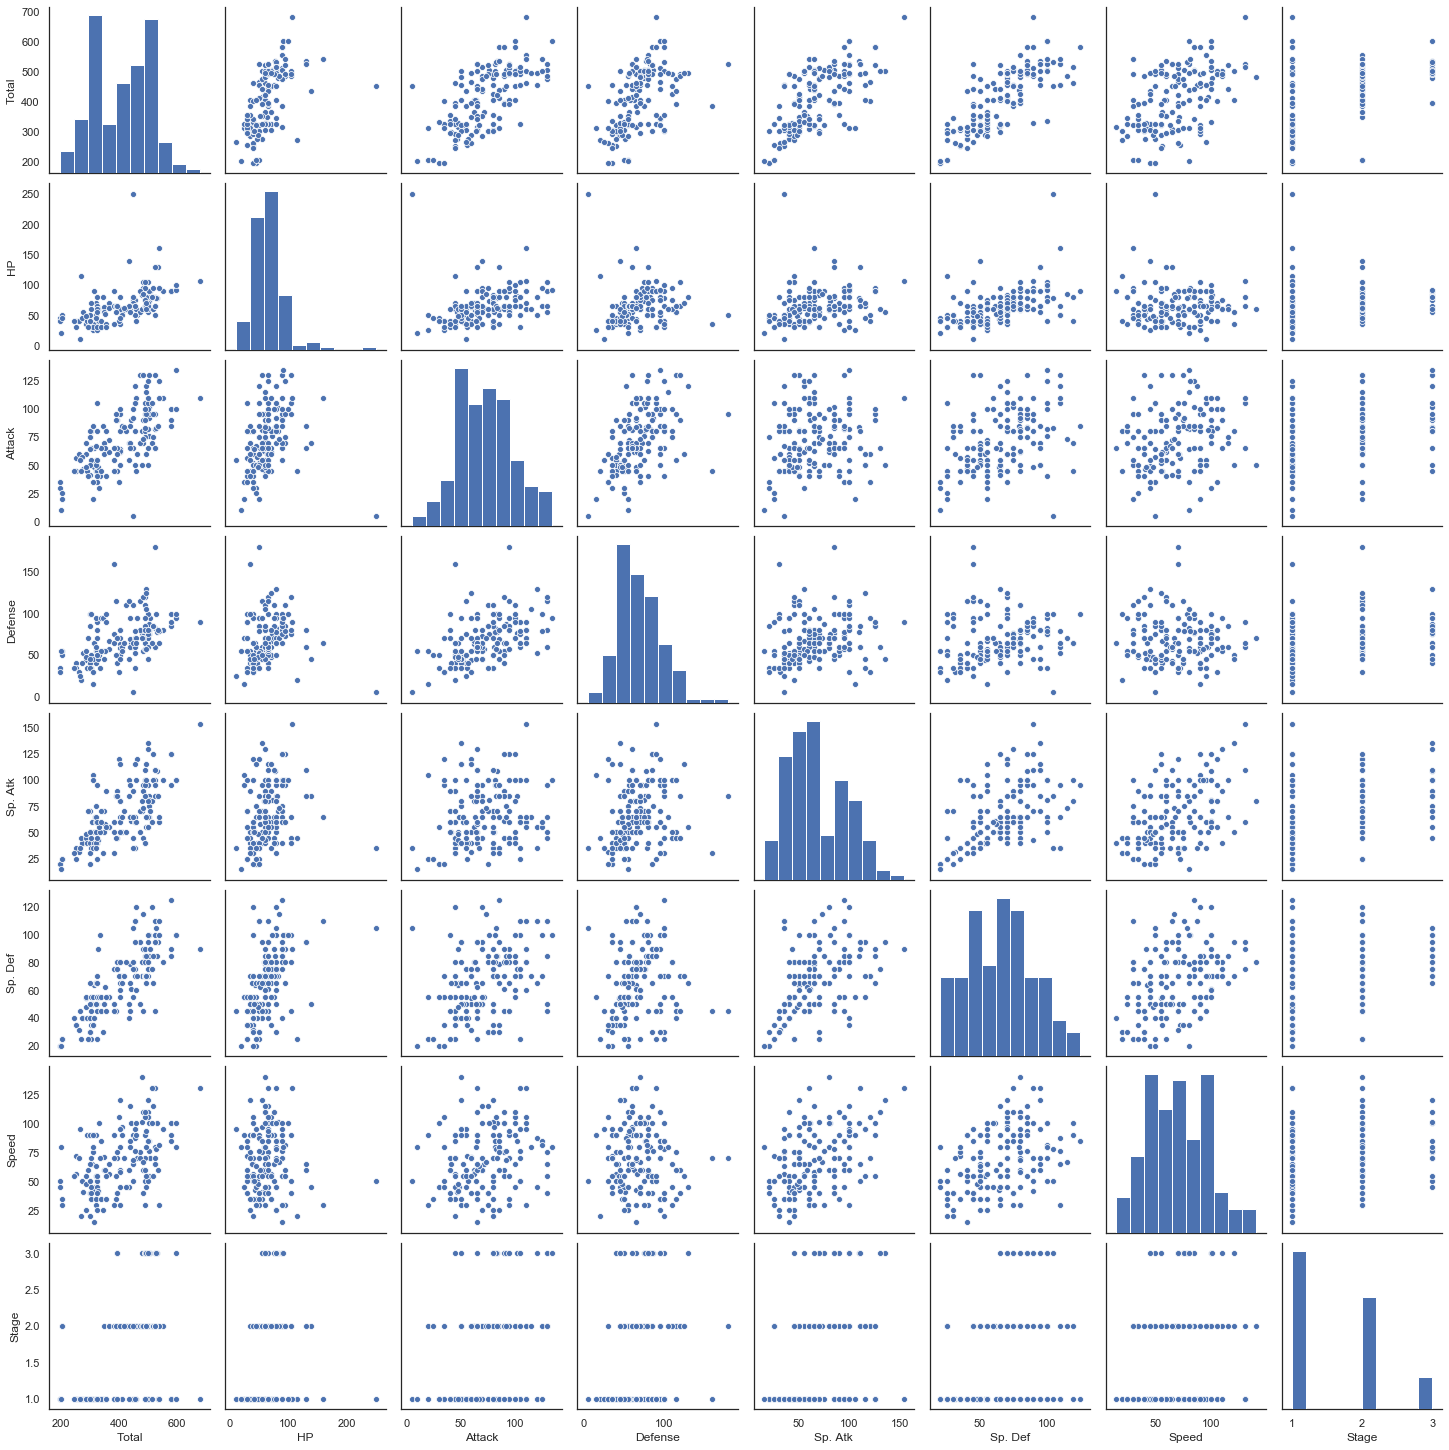

In [15]:
stats_df = df.drop(['Name','Type 1', 'Type 2', 'Legendary'], axis=1)

g = sns.pairplot(stats_df)


### 3.5 Heatmap

A heat map (or heatmap) is a data visualization technique that shows magnitude of a phenomenon as color in two dimensions. 
A common use of heat map is to display the correlation between a pair of variables.

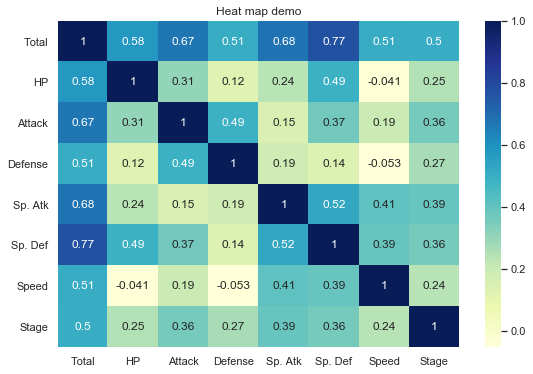

In [16]:
# Calculate correlations
corr = stats_df.corr()

plt.figure(figsize=(9,6))
# Heatmap
ax = sns.heatmap(corr, annot=True, cmap="YlGnBu")

_ = ax.set_title('Heat map demo')

## 4. Catergory Plots

Categorical plots are also necessary in Data Exploration step, as they tells us about how different classes of a variable are distributed in dataset. If we have sufficient data, we can make conclusions off these plots for different classes of that variable.

Similar to the relationship between `relplot()` and either `scatterplot()` or `lineplot()`, there are two ways to make these plots. There are a number of axes-level functions for plotting categorical data in different ways and a figure-level interface, `catplot()`, that gives unified higher-level access to them.

It’s helpful to think of the different categorical plot kinds as belonging to three different families, which we’ll discuss in detail below. They are:

Categorical scatterplots:

- `stripplot()` (with `kind="strip"`; the default)

- `swarmplot()` (with `kind="swarm"`)

Categorical distribution plots:

- `boxplot()` (with `kind="box"`)

- `violinplot()` (with `kind="violin"`)

- `boxenplot()` (with `kind="boxen"`)

Categorical estimate plots:

- `pointplot()` (with `kind="point"`)

- `barplot()` (with `kind="bar"`)

- `countplot()` (with `kind="count"`)


### 4.1 Bar plot

Bar plots help us visualize the distributions of categorical variables.
`sns.countplot` is a kind of bar plot, we can apply it for bar plot:

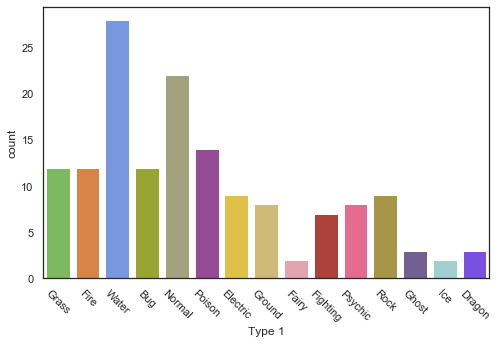

In [17]:
pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]

plt.figure(figsize=(8, 5))

# Count Plot (a.k.a. Bar Plot)
ax = sns.countplot(x='Type 1', data=df, palette=pkmn_type_colors)      
# Rotate x-labels
#plt.xticks(rotation=-45)
ax.set_xticklabels(ax.get_xticklabels(), rotation=-45)
plt.show()

### 4.2 Box plot

Box plot is a statistical version of distribution plot. It gives us range of different quantile, mean, and extremas. Some possible use-case can be that with it you can identify variables in which you can find outliers if some points are way out of box-whisker’s range, or you can check for skew in distribution by relative placement of middle box in plot.

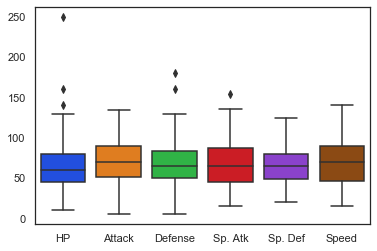

In [18]:
# Preprocess data set by dropping some columns
stats_df = df.drop(['Total', 'Stage', 'Legendary'], axis=1)
 
# New boxplot using stats_df
ax = sns.boxplot(data=stats_df, palette = 'bright')

### 4.3 Volin plot

Violin plot are extension of Box plot. It also has indicators of mean, extremas, and possibly different quartiles too. In addition to these it also shows probability distribution of the variable, on both sides.

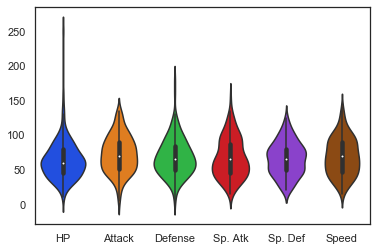

In [19]:
# volin plot using stats_df
ax = sns.violinplot(data=stats_df, palette='bright')

### 4.4 Swarm plot

Violin plots are great for visualizing distributions. However, since we only have 151 Pokémon in our dataset, we may want to simply display each point.

That's where the swarm plot comes in. This visualization will show each point, while "stacking" those with similar values.

Let us use two methods to do the plotting: `sns.swarmplot()` and `sns.catplot(kind = 'swarm')`

Firstly, `sns.swarmplot()`:

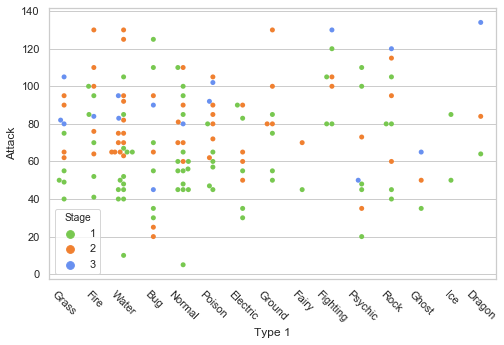

In [20]:
sns.set(style='whitegrid')
plt.figure(figsize=(8,5))
# Swarm plot with Pokemon color palette
ax = sns.swarmplot(x='Type 1', y='Attack', hue = 'Stage', data=df, palette=pkmn_type_colors)
ax.set_xticklabels(ax.get_xticklabels(), rotation=-45)

plt.show()

The above plotting has misplaced legend inside the plot. To fix it, we have to directly call to `matplotlib` on legend:

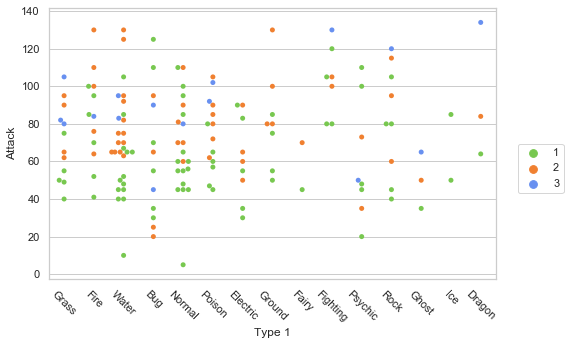

In [21]:
sns.set(style='whitegrid')
plt.figure(figsize=(8,5))
# Swarm plot with Pokemon color palette
ax = sns.swarmplot(x='Type 1', y='Attack', hue = 'Stage', data=df, palette=pkmn_type_colors)
ax.set_xticklabels(ax.get_xticklabels(), rotation=-45)
plt.legend(bbox_to_anchor=(1.05, 0.5), loc=2, borderaxespad=0.)
plt.show()

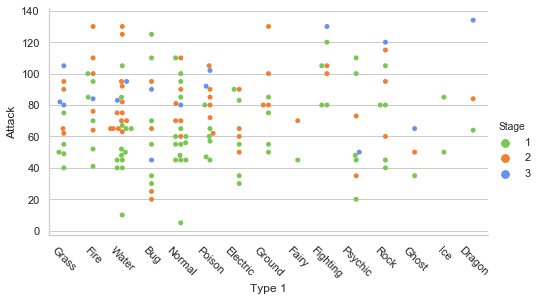

In [22]:
sns.set(style='whitegrid')
# Swarm plot with Pokemon color palette
g = sns.catplot(x='Type 1', y='Attack', hue = 'Stage', data=df, 
              palette=pkmn_type_colors, kind='swarm', height=4, aspect=7/4)
_ = g.ax.set_xticklabels(g.ax.get_xticklabels(), rotation=-45)
plt.show()

### 4.5 Swarm plot (bee plot) and overlaying with volin plot

Violin plots are great for visualizing distributions. However, since we only have 151 Pokémon in our dataset, we may want to simply display each point.


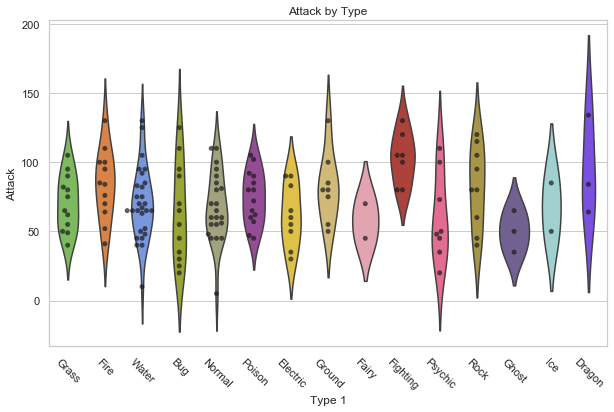

In [23]:
# Set figure size with matplotlib
plt.figure(figsize=(10,6))
 
# Create plot
ax1 = sns.violinplot(x='Type 1',
               y='Attack', 
               data=df, 
               inner=None, # Remove the bars inside the violins
               palette=pkmn_type_colors)
 
ax2 = sns.swarmplot(x='Type 1', 
              y='Attack', 
              data=df, 
              color='k', # Make points black
              alpha=0.7) # and slightly transparent
 
# Set title with matplotlib
_ = plt.title('Attack by Type')
_ = plt.xticks(rotation=-45)